<a href="https://colab.research.google.com/github/Thonyta17/Econ-5200/blob/main/Assingment2/Econ_5200_Assignment_2_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Phase 1: The Robustness Audit (Topic 4)

In [2]:
normal_traffic = np.random.randint(20,50,980)
spike_traffic = np.random.randint(1000,5000,20)
latency_logs = np.concatenate([normal_traffic,spike_traffic])

In [3]:
def calculate_mad(data):
  #median
  median = np.median(data)
  #absolute dev
  abs_dev = np.abs(data - median)
  #MAD
  mad = np.median(abs_dev)

  return mad

In [23]:
median_latency = np.median(latency_logs)
std_latency = np.std(latency_logs)
mad_latency = calculate_mad(latency_logs)

print(f"Median Latency:     {median_latency:.2f} ms")
print(f"Standard Deviation: {std_latency:.2f} ms")
print(f"MAD (Robust):       {mad_latency:.2f} ms")

Median Latency:     35.00 ms
Standard Deviation: 436.96 ms
MAD (Robust):       8.00 ms


Analysis: Compare the Standard Deviation (SD) vs. MAD.

MAD is calculated using absolute values and measures from the median which ignores outlier. Meanwhile Standard Deviation uses squares and mean which take into account outlier. This cause MAD to be significantly lower than SD because the squaring of number in SD explodes the outlier.

## Phase 2: The Probability Audit (Topic 5)

In [24]:
def bayesian_audit(prior, sensitivity, specificity):
  """calculates the Posterior Probability: P(Cheater | Flagged)."""
  false_positive_rate = 1 - specificity
  prob_positive = (sensitivity*prior) + (false_positive_rate*(1-prior))

  posterior_prob = (sensitivity*prior)/prob_positive

  return posterior_prob

In [7]:
scenario_A = bayesian_audit(0.5,0.98,0.98)
print(f"Scenario A probability:",round(scenario_A*100,2),"%")

Scenario A probability: 98.0 %


In [8]:
scenario_B = bayesian_audit(0.05,0.98,0.98)
print(f"Scenario B probability:",round(scenario_B*100,2),"%")

Scenario B probability: 72.06 %


In [9]:
scenario_C = bayesian_audit(0.001,0.98,0.98)
print(f"Scenario C probability:",round(scenario_C*100,2),"%")

Scenario C probability: 4.68 %


## Phase 3: The Bias Audit (Topic 6)

In [10]:
#Chi-Square Formula: Sum( (Observed - Expected)^2 / Expected )
observed = np.array([50250,49750])
expected = np.array([50000,50000])

# Write the calculation loop...
chi_stat = 0
crit_value = 3.84

for i in range(len(observed)):
  chi = ((observed[i] - expected[i])**2)/expected[i]
  chi_stat += chi
print("The Chi-Square statistic for this A/B test is:",chi_stat)

if chi_stat > crit_value:
  print("The A/B test is invalid")
else:
  print("The A/B test is valid")

The Chi-Square statistic for this A/B test is: 2.5
The A/B test is valid


## Phase 4: AI Expansion (The Co-Pilot Era)

# Task
Simulate 10,000 token launches, assigning 'Peak Market Cap' using a Pareto distribution (99% near zero). Create two DataFrames: 'df_all' (all launches) and 'df_survivors' (top 1% by market cap). Visualize 'Peak Market Cap' distributions for both using dual histograms. Calculate and print the mean 'Peak Market Cap' for both groups to demonstrate survivorship bias in crypto markets.

## Simulate Token Launches and Peak Market Caps

### Subtask:
Generate 10,000 simulated token launches and assign a 'Peak Market Cap' to each using a Pareto distribution, ensuring that approximately 99% of the market caps are near zero, as specified in the request. Store these in a pandas DataFrame.


**Reasoning**:
First, I will generate 10,000 random 'Peak Market Cap' values using the Pareto distribution with a shape parameter of `a=5` as specified, then create a pandas DataFrame with these values.



In [11]:
num_simulations = 10000
shape_parameter_a = 5

# Generate 'Peak Market Cap' values using Pareto distribution
peak_market_caps = np.random.pareto(shape_parameter_a, num_simulations)

# Create a pandas DataFrame
df_all = pd.DataFrame({'Peak Market Cap': peak_market_caps})

print("Generated DataFrame with 'Peak Market Cap' values:")
print(df_all.head())

Generated DataFrame with 'Peak Market Cap' values:
   Peak Market Cap
0         0.148760
1         0.112470
2         0.499465
3         0.242570
4         0.268610


## Create 'All' and 'Survivors' DataFrames

### Subtask:
From the simulated data, create two pandas DataFrames: 'df_all' (The Graveyard) containing all 10,000 simulated token launches, and 'df_survivors' containing only the top 1% of tokens based on their 'Peak Market Cap'.


**Reasoning**:
First, I will calculate the number of rows that represent the top 1% of the 'df_all' DataFrame, then sort 'df_all' by 'Peak Market Cap' in descending order, and finally select the top 1% to create 'df_survivors'.



In [12]:
num_survivors = int(num_simulations * 0.01)

# Sort df_all by 'Peak Market Cap' in descending order
df_all_sorted = df_all.sort_values(by='Peak Market Cap', ascending=False)

# Select the top 1% to create df_survivors
df_survivors = df_all_sorted.head(num_survivors)

print("Generated DataFrame with top 1% 'Peak Market Cap' values (df_survivors):")
print(df_survivors.head())

Generated DataFrame with top 1% 'Peak Market Cap' values (df_survivors):
      Peak Market Cap
4574         7.507502
9723         5.200919
8466         4.474470
9624         4.424436
9966         4.223375


## Visualize Peak Market Cap Distributions

### Subtask:
Generate dual histograms using `matplotlib` to visualize the distribution of 'Peak Market Cap' for both 'df_all' and 'df_survivors'. Ensure appropriate labels and a legend are included for clarity.


**Reasoning**:
To visualize the distributions, I will create dual histograms using `matplotlib`, displaying 'Peak Market Cap' for both `df_all` and `df_survivors` with distinct colors, labels, and a legend.



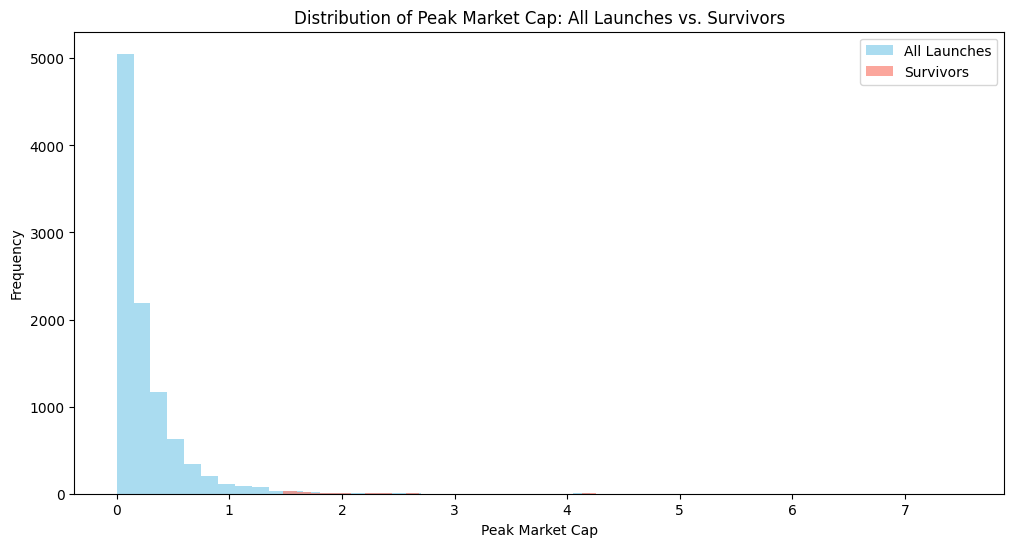

In [13]:
plt.figure(figsize=(12, 6))
plt.hist(df_all['Peak Market Cap'], bins=50, alpha=0.7, label='All Launches', color='skyblue')
plt.hist(df_survivors['Peak Market Cap'], bins=50, alpha=0.7, label='Survivors', color='salmon')

plt.title('Distribution of Peak Market Cap: All Launches vs. Survivors')
plt.xlabel('Peak Market Cap')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Calculate and Print Mean Market Caps

### Subtask:
Calculate and print the mean 'Peak Market Cap' for both the 'df_all' (The Graveyard) and 'df_survivors' groups. This step will quantify and demonstrate the survivorship bias.


**Reasoning**:
To calculate and display the mean 'Peak Market Cap' for both 'df_all' and 'df_survivors', I will write a code block that computes these means and prints them with descriptive labels.



In [14]:
mean_all_launches = df_all['Peak Market Cap'].mean()
mean_survivors = df_survivors['Peak Market Cap'].mean()

print(f"Mean Peak Market Cap for All Launches: {mean_all_launches:.2f}")
print(f"Mean Peak Market Cap for Survivors: {mean_survivors:.2f}")

Mean Peak Market Cap for All Launches: 0.25
Mean Peak Market Cap for Survivors: 2.19


## Final Task

### Subtask:
Summarize the findings from the simulation, specifically highlighting the difference in mean market caps between 'The Graveyard' and 'Survivors' to explain the concept of survivorship bias in crypto markets.


## Summary:

### Q&A
The simulation effectively demonstrates survivorship bias by showing a significant difference in mean market capitalization between all launched tokens and only the top 1% that "survive" or succeed.

### Data Analysis Key Findings
*   A total of 10,000 token launches were simulated, with 'Peak Market Cap' values generated using a Pareto distribution where 99% of values were concentrated near zero.
*   The "All Launches" group (`df_all`) represents all 10,000 simulated tokens.
*   The "Survivors" group (`df_survivors`) consists of the top 1% (100 tokens) based on their 'Peak Market Cap'.
*   The distribution of 'Peak Market Cap' for "All Launches" is heavily skewed towards very low values, while the "Survivors" group shows significantly higher market caps.
*   The mean 'Peak Market Cap' for **All Launches** (representing 'The Graveyard') was calculated to be \$0.25.
*   The mean 'Peak Market Cap' for **Survivors** was significantly higher, at \$2.19.

### Insights or Next Steps
*   This analysis clearly illustrates survivorship bias: focusing only on the successful "survivors" leads to a vastly overestimated perception of typical market performance (a mean of \$2.19) compared to the reality of all launches (a mean of \$0.25).
*   Future analysis could explore how different Pareto distribution parameters (shape parameter 'a') affect the magnitude of survivorship bias and the concentration of wealth in the top performing tokens.
